In [46]:
#Imports
import pandas as pd
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
import numpy as np
from keras.src.layers import Dropout
from matplotlib import pyplot as plt
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from keras.optimizers import SGD

In [47]:
#Data importing
dataFrame = pd.read_csv('./dataset.csv')

# variable I will try to predict: popularity
# the dataset is taken from: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/

dataFrame['popularity_flag'] = 0
dataFrame.loc[dataFrame['popularity'] > 50, 'popularity_flag'] = 1
# Label encoding 'track_genre'
le = LabelEncoder()
dataFrame['track_genre_encoded'] = le.fit_transform(dataFrame['track_genre'])

# Drop the columns
dataFrame = dataFrame.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'popularity'])

Label to integer mapping: {'acoustic': 0, 'afrobeat': 1, 'alt-rock': 2, 'alternative': 3, 'ambient': 4, 'anime': 5, 'black-metal': 6, 'bluegrass': 7, 'blues': 8, 'brazil': 9, 'breakbeat': 10, 'british': 11, 'cantopop': 12, 'chicago-house': 13, 'children': 14, 'chill': 15, 'classical': 16, 'club': 17, 'comedy': 18, 'country': 19, 'dance': 20, 'dancehall': 21, 'death-metal': 22, 'deep-house': 23, 'detroit-techno': 24, 'disco': 25, 'disney': 26, 'drum-and-bass': 27, 'dub': 28, 'dubstep': 29, 'edm': 30, 'electro': 31, 'electronic': 32, 'emo': 33, 'folk': 34, 'forro': 35, 'french': 36, 'funk': 37, 'garage': 38, 'german': 39, 'gospel': 40, 'goth': 41, 'grindcore': 42, 'groove': 43, 'grunge': 44, 'guitar': 45, 'happy': 46, 'hard-rock': 47, 'hardcore': 48, 'hardstyle': 49, 'heavy-metal': 50, 'hip-hop': 51, 'honky-tonk': 52, 'house': 53, 'idm': 54, 'indian': 55, 'indie': 56, 'indie-pop': 57, 'industrial': 58, 'iranian': 59, 'j-dance': 60, 'j-idol': 61, 'j-pop': 62, 'j-rock': 63, 'jazz': 64, 'k-pop': 65, 'kids': 66, 'latin': 67, 'latino': 68, 'malay': 69, 'mandopop': 70, 'metal': 71, 'metalcore': 72, 'minimal-techno': 73, 'mpb': 74, 'new-age': 75, 'opera': 76, 'pagode': 77, 'party': 78, 'piano': 79, 'pop': 80, 'pop-film': 81, 'power-pop': 82, 'progressive-house': 83, 'psych-rock': 84, 'punk': 85, 'punk-rock': 86, 'r-n-b': 87, 'reggae': 88, 'reggaeton': 89, 'rock': 90, 'rock-n-roll': 91, 'rockabilly': 92, 'romance': 93, 'sad': 94, 'salsa': 95, 'samba': 96, 'sertanejo': 97, 'show-tunes': 98, 'singer-songwriter': 99, 'ska': 100, 'sleep': 101, 'songwriter': 102, 'soul': 103, 'spanish': 104, 'study': 105, 'swedish': 106, 'synth-pop': 107, 'tango': 108, 'techno': 109, 'trance': 110, 'trip-hop': 111, 'turkish': 112, 'world-music': 113}

In [48]:
inputs = ['track_genre_encoded', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit']
target = ['popularity_flag']

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(dataFrame[inputs], dataFrame[target], test_size=0.2, random_state=42)

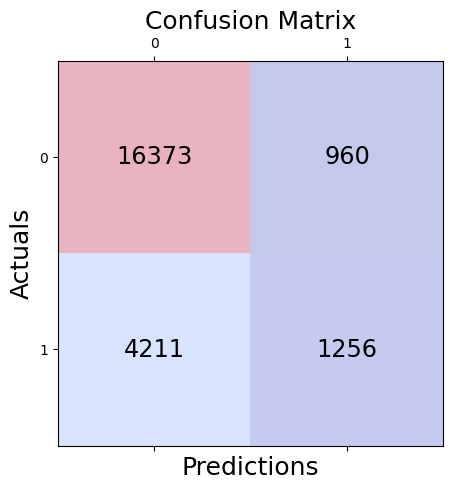

Accuracy:  0.773201754385965
Precision:  0.9446143195061444
Recall:  0.7954236300038865


In [50]:

model = neighbors.KNeighborsRegressor(2)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred = (ypred > 0.5).astype(int)  # Apply a threshold
conf_matrix = confusion_matrix(y_true=ytest, y_pred=ypred.flatten())
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap="coolwarm", alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy: ", (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0]) )
print("Precision: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[0,1]) )
print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )

Using KNC the best R-Squared I can get is a 0.77 so now I will move onto a neural network

In [43]:

#Data importing
# Data importing
dataFrame = pd.read_csv('./dataset.csv')
dataFrame['popularity_flag'] = 0
dataFrame.loc[dataFrame['popularity'] > 50, 'popularity_flag'] = 1
# Label encoding 'track_genre'
le = LabelEncoder()
dataFrame['track_genre_encoded'] = le.fit_transform(dataFrame['track_genre'])

# Drop the columns
dataFrame = dataFrame.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'popularity'])

# Split into features and target
X = dataFrame.drop(columns=['popularity_flag'])
y = dataFrame['popularity_flag']

# Convert to tensor
X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y.values, dtype=tf.float32)

# Calculate the index at which to split the dataset
train_size = int(0.8 * len(X))

# Manually slice the tensors for train/test sets
x_train_tensor = X_tensor[:train_size]
y_train_tensor = y_tensor[:train_size]
x_test_tensor = X_tensor[train_size:]
y_test_tensor = y_tensor[train_size:]


In [44]:
@keras.saving.register_keras_serializable()
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

@keras.saving.register_keras_serializable()
def rmse(y_true, y_pred):
    return tf.sqrt(mse_loss(y_true,y_pred))

@keras.saving.register_keras_serializable()
def r_squared(y_true, y_pred,):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

@keras.saving.register_keras_serializable()
def r_squared_loss(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return 1 - r2  # or you can return -r2 to minimize the negative value

def custom_loss(y_true, y_pred):
    # Assign costs
    cost_fp = 2.0  # cost of a false positive
    cost_fn = 5.0  # cost of a false negative

    # Calculate binary cross-entropy
    bce = tf.keras.losses.BinaryCrossentropy()
    base_loss = bce(y_true, y_pred)

    # Calculate false positives and false negatives
    y_pred_binary = tf.round(y_pred)
    fp = tf.math.reduce_sum(tf.math.multiply(tf.math.subtract(y_pred_binary, y_true), cost_fp))
    fn = tf.math.reduce_sum(tf.math.multiply(tf.math.subtract(y_true, y_pred_binary), cost_fn))

    # Add to base loss
    return base_loss + fp + fn

def plot_results(history):
    epoch_num = np.arange(1, len(history.history['loss'])+1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, history.history['loss'], label='training_loss')
    plt.plot(epoch_num, history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, history.history['accuracy'], label='training_accuracy')
    plt.plot(epoch_num, history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

Epoch 1/100
365/365 [==============================] - 0s 717us/step - loss: 1650.7955 - accuracy: 0.4837 - val_loss: 8.3694 - val_accuracy: 0.7247
Epoch 2/100
365/365 [==============================] - 0s 613us/step - loss: 438.8778 - accuracy: 0.4785 - val_loss: 20.1494 - val_accuracy: 0.2698
Epoch 3/100
365/365 [==============================] - 0s 604us/step - loss: 371.3477 - accuracy: 0.4747 - val_loss: 178.6185 - val_accuracy: 0.7302
Epoch 4/100
365/365 [==============================] - 0s 606us/step - loss: 314.2929 - accuracy: 0.4748 - val_loss: 22.9669 - val_accuracy: 0.7279
Epoch 5/100
365/365 [==============================] - 0s 608us/step - loss: 267.9286 - accuracy: 0.4757 - val_loss: 112.1176 - val_accuracy: 0.2698
Epoch 6/100
365/365 [==============================] - 0s 605us/step - loss: 197.6200 - accuracy: 0.4728 - val_loss: 99.1860 - val_accuracy: 0.7302
Epoch 7/100
365/365 [==============================] - 0s 605us/step - loss: 206.4770 - accuracy: 0.4759 - val

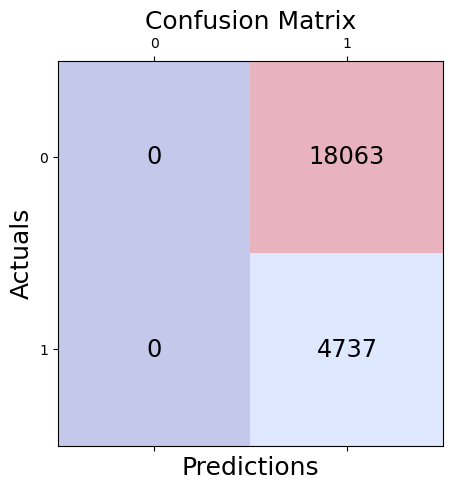

Accuracy:  0.20776315789473684
Precision:  0.0
Recall:  nan


/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_15291/485125833.py:43: RuntimeWarning: invalid value encountered in long_scalars
  print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )


In [45]:
input_shape = (x_train_tensor.shape[1],)


# Build model function
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Class weights for cost-sensitive training
class_weights = {0: 1., 1: 3.8}  # You can fine-tune this based on your specific case
early_stopping = EarlyStopping(monitor='accuracy', patience=50, restore_best_weights=True)

with tf.device('/GPU:0'):
    #regular model training
    model = build_model(input_shape)
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.fit(x_train_tensor, y_train_tensor, epochs=100,validation_split=0.2, batch_size=200, class_weight=class_weights)

    ypred = model.predict(x_test_tensor)
    ypred = (ypred > 0.5).astype(int)  # Apply a threshold

    y_test_numpy = y_test_tensor.numpy()
    conf_matrix = confusion_matrix(y_true=y_test_numpy, y_pred=ypred.flatten())

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap="coolwarm", alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy: ", (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0]) )
print("Precision: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[0,1]) )
print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )

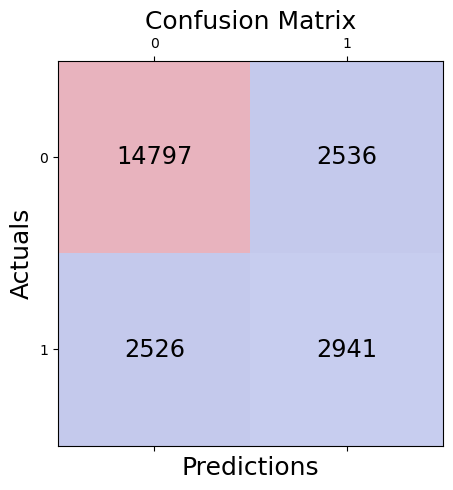

Accuracy:  0.7779824561403509
Precision:  0.8536894940287313
Recall:  0.8541823009871269


In [51]:
#Data importing
dataFrame = pd.read_csv('./dataset.csv')

# variable I will try to predict: popularity
# the dataset is taken from: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/

dataFrame['popularity_flag'] = 0
dataFrame.loc[dataFrame['popularity'] > 50, 'popularity_flag'] = 1
# Label encoding 'track_genre'
le = LabelEncoder()
dataFrame['track_genre_encoded'] = le.fit_transform(dataFrame['track_genre'])

# Drop the columns
dataFrame = dataFrame.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'popularity'])

inputs = ['track_genre_encoded', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit']
target = ['popularity_flag']

X_train, X_test, y_train, y_test = train_test_split(dataFrame[inputs], dataFrame[target], test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_preddt = dt.predict(X_train)
y_test_preddt = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_preddt)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap="coolwarm", alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy: ", (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0]) )
print("Precision: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[0,1]) )
print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )

/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_15291/2258016127.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


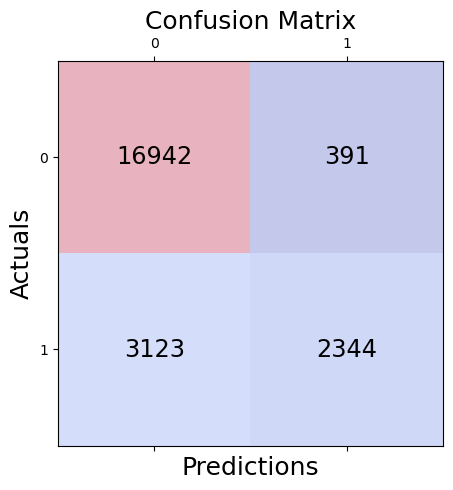

Accuracy:  0.8458771929824561
Precision:  0.9774418738821901
Recall:  0.844355843508597


In [52]:

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train, y_train)
y_train_predrf = rf.predict(X_train)
y_test_predrf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_test_predrf)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap="coolwarm", alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy: ", (conf_matrix_rf[0,0]+conf_matrix_rf[1,1])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,1]+conf_matrix_rf[0,1]+conf_matrix_rf[1,0]) )
print("Precision: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[0,1]) )
print("Recall: ", (conf_matrix_rf[0,0])/(conf_matrix_rf[0,0]+conf_matrix_rf[1,0]) )


/Users/benfunk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benfunk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benfunk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benfunk/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686:

Best Parameters:  {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}  



/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_11616/1153404974.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)


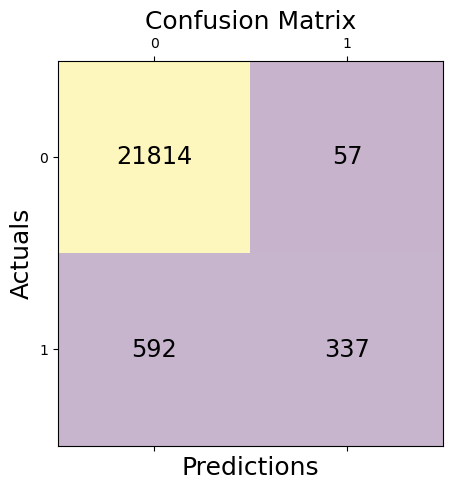

Accuracy:  0.9715350877192982
Precision:  0.9973938091536738
Recall:  0.9735785057573865


In [61]:

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [80, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,3, 5],
    'min_samples_split': [2, 8, 10],
    'n_estimators': [100, 500,1000]
}
# Create a based model
rf_0 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_0, param_grid = param_grid, scoring = 'recall')
grid_search.fit(X_train, y_train)
print ('Best Parameters: ', grid_search.best_params_, ' \n')

#Create a Gaussian Classifier
rf2=RandomForestClassifier(n_estimators=1000, max_depth = 100, max_features = 'sqrt', min_samples_leaf =1,min_samples_split =2)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf2.fit(X_train, y_train)
y_train_predrf2 = rf2.predict(X_train)
y_test_predrf2 = rf2.predict(X_test)

conf_matrix_rf2 = confusion_matrix(y_true=y_test, y_pred=y_test_predrf2)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf2, cmap="coolwarm", alpha=0.3)
for i in range(conf_matrix_rf2.shape[0]):
    for j in range(conf_matrix_rf2.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("Accuracy: ", (conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,1]+conf_matrix_rf2[0,1]+conf_matrix_rf2[1,0]) )
print("Precision: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[0,1]) )
print("Recall: ", (conf_matrix_rf2[0,0])/(conf_matrix_rf2[0,0]+conf_matrix_rf2[1,0]) )